#Importing libraries and required image

In [1]:
import matplotlib.pyplot as plt
from skimage import io
from skimage import color
from skimage.transform import resize
import math
from skimage.feature import hog
import numpy as np

In [2]:
img = resize(color.rgb2gray(io.imread("B.jpg")), (128, 64))

#Visualization of image to be used

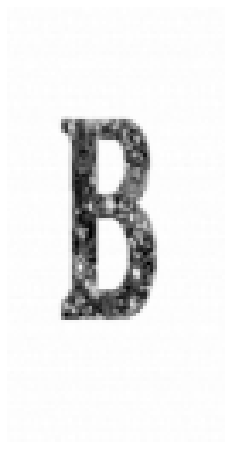

In [3]:
plt.figure(figsize=(15, 8))
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [4]:
img = np.array(img)

#Calculating gradient and angle of the image

In [5]:
mag = []
theta = []
for i in range(128):
  magnitudeArray = []
  angleArray = []
  for j in range(64):
    # Condition for axis 0
    if j-1 <= 0 or j+1 >= 64:
      if j-1 <= 0:
        # Condition if first element
        Gx = img[i][j+1] - 0
      elif j + 1 >= len(img[0]):
        Gx = 0 - img[i][j-1]
    # Condition for first element
    else:
      Gx = img[i][j+1] - img[i][j-1]
    
    # Condition for axis 1
    if i-1 <= 0 or i+1 >= 128:
      if i-1 <= 0:
        Gy = 0 - img[i+1][j]
      elif i +1 >= 128:
        Gy = img[i-1][j] - 0
    else:
      Gy = img[i-1][j] - img[i+1][j]

    # Calculating magnitude
    magnitude = math.sqrt(pow(Gx, 2) + pow(Gy, 2))
    magnitudeArray.append(round(magnitude, 9))

    # Calculating angle
    if Gx == 0:
      angle = math.degrees(0.0)
    else:
      angle = math.degrees(abs(math.atan(Gy / Gx)))
    angleArray.append(round(angle, 9))
  mag.append(magnitudeArray)
  theta.append(angleArray)

In [6]:
mag = np.array(mag)

In [7]:
theta = np.array(theta)

#Visualization of magnitude of the image

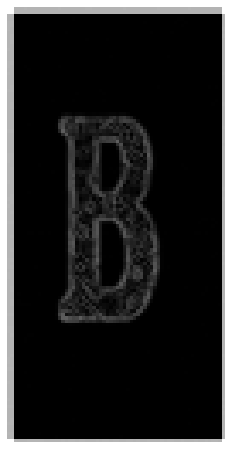

In [8]:
plt.figure(figsize=(15, 8))
plt.imshow(mag, cmap="gray")
plt.axis("off")
plt.show()

#Visualization of angle of the image

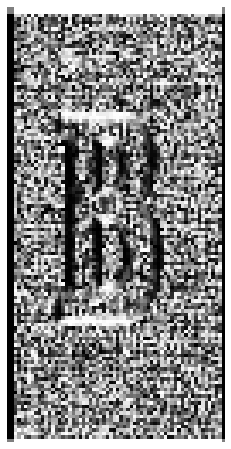

In [9]:
plt.figure(figsize=(15, 8))
plt.imshow(theta, cmap="gray")
plt.axis("off")
plt.show()

In [10]:
number_of_bins = 9
step_size = 180 / number_of_bins

##Function to calculate the $j^{th}$ bin

In [11]:
def calculate_j(angle):
  temp = (angle / step_size) - 0.5
  j = math.floor(temp)
  return j

##Function to calculate the value of centre of $j^{th}$ bin

In [12]:
def calculate_Cj(j):
  Cj = step_size * (j + 0.5)
  return round(Cj, 9)

##Function to calculate the value of $j^{th}$ bin

In [13]:
def calculate_value_j(magnitude, angle, j):
  Cj = calculate_Cj(j+1)
  Vj = magnitude * ((Cj - angle) / step_size)
  return round(Vj, 9)

#Provides a 9 point histogram for 8x8 cells

In [14]:
histogram_points_nine = []
for i in range(0, 128, 8):
  temp = []
  for j in range(0, 64, 8):
    magnitude_values = [[mag[i][x] for x in range(j, j+8)] for i in range(i,i+8)]
    angle_values = [[theta[i][x] for x in range(j, j+8)] for i in range(i, i+8)]
    for k in range(len(magnitude_values)):
      for l in range(len(magnitude_values[0])):
        bins = [0.0 for _ in range(number_of_bins)]
        value_j = calculate_j(angle_values[k][l])
        Vj = calculate_value_j(magnitude_values[k][l], angle_values[k][l], value_j)
        Vj_1 = magnitude_values[k][l] - Vj
        bins[value_j]+=Vj
        bins[value_j+1]+=Vj_1
        bins = [round(x, 9) for x in bins]
    temp.append(bins)
  histogram_points_nine.append(temp)

In [15]:
print(len(histogram_points_nine))
print(len(histogram_points_nine[0]))
print(len(histogram_points_nine[0][0]))

16
8
9


#Provides a HOG feature vector for the 9 point histogram provided by making block from 2x2 blocks
##(1 block is made up of 8x8 cells)

In [16]:
epsilon = 1e-05

In [17]:
feature_vectors = []
for i in range(0, len(histogram_points_nine) - 1, 1):
  temp = []
  for j in range(0, len(histogram_points_nine[0]) - 1, 1):
    values = [[histogram_points_nine[i][x] for x in range(j, j+2)] for i in range(i, i+2)]
    final_vector = []
    for k in values:
      for l in k:
        for m in l:
          final_vector.append(m)
    k = round(math.sqrt(sum([pow(x, 2) for x in final_vector])), 9)
    final_vector = [round(x/(k + epsilon), 9) for x in final_vector]
    temp.append(final_vector)
  feature_vectors.append(temp)

In [18]:
print(len(feature_vectors))
print(len(feature_vectors[0]))
print(len(feature_vectors[0][0]))

15
7
36


#Number of HOG features obtained

In [19]:
print(f'Number of HOG features = {len(feature_vectors) * len(feature_vectors[0]) * len(feature_vectors[0][0])}')

Number of HOG features = 3780
